In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

%matplotlib inline
pd.options.display.max_rows = 68
pd.options.display.max_columns = 68

In [185]:
# read the sequences file
arquivo = 'hikoyu_fasta.txt'

file_content = open(arquivo, "r")
"""file_content.close() """

all_lines = file_content.readlines();

sequences = {}
sequences_info = {}
description = ''

for line in all_lines:
    
    sequence = []
    
    if ">" in line:
        description = line
        sequence = []
        sequences[description] = sequence
    else:
        sequences[description].append(line)


In [186]:
#count A,T,C,G,AA,AT,AC,AG,TT,TA,TC,TG,CC,CA,CT,CG,GG,GA,GT,GC for each sequence

for description in sequences:
    
    sequences_info[description] = {}
    
    sequences_info[description]['A'] = 0
    sequences_info[description]['T'] = 0
    sequences_info[description]['C'] = 0
    sequences_info[description]['G'] = 0
    
    sequences_info[description]['AA'] = 0
    sequences_info[description]['AT'] = 0
    sequences_info[description]['AC'] = 0
    sequences_info[description]['AG'] = 0
    
    sequences_info[description]['TA'] = 0
    sequences_info[description]['TT'] = 0
    sequences_info[description]['TC'] = 0
    sequences_info[description]['TG'] = 0
    
    sequences_info[description]['CA'] = 0
    sequences_info[description]['CT'] = 0
    sequences_info[description]['CC'] = 0
    sequences_info[description]['CG'] = 0
    
    sequences_info[description]['GA'] = 0
    sequences_info[description]['GT'] = 0
    sequences_info[description]['GC'] = 0
    sequences_info[description]['GG'] = 0
    
    sequences_info[description]['SIZE'] = 0
    
    #key = '>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n'

    for line in sequences[description]:
        
        sequences_info[description]['SIZE'] += len(line)
        sequences_info[description]['A'] += line.count('A')
        sequences_info[description]['T'] += line.count('T')
        sequences_info[description]['C'] += line.count('C')
        sequences_info[description]['G'] += line.count('G')
        
        sequences_info[description]['AA'] += line.count('AA')
        sequences_info[description]['AT'] += line.count('AT')
        sequences_info[description]['AC'] += line.count('AC')
        sequences_info[description]['AG'] += line.count('AG')
    
        sequences_info[description]['TA'] += line.count('AT')
        sequences_info[description]['TT'] += line.count('TT')
        sequences_info[description]['TC'] += line.count('TC')
        sequences_info[description]['TG'] += line.count('TG')
    
        sequences_info[description]['CA'] += line.count('CA')
        sequences_info[description]['CT'] += line.count('CT')
        sequences_info[description]['CC'] += line.count('CC')
        sequences_info[description]['CG'] += line.count('CG')
    
        sequences_info[description]['GA'] += line.count('GA')
        sequences_info[description]['GT'] += line.count('GT')
        sequences_info[description]['GC'] += line.count('GC')
        sequences_info[description]['GG'] += line.count('GG')   
    

In [187]:
#calc nucleotideo bias

for description in sequences:
         
    fA = sequences_info[description]['A'] / sequences_info[description]['SIZE'] 
    fT = sequences_info[description]['T'] / sequences_info[description]['SIZE']
    fC = sequences_info[description]['C'] / sequences_info[description]['SIZE']
    fG = sequences_info[description]['G'] / sequences_info[description]['SIZE'] 
        
    fAA = sequences_info[description]['AA'] / sequences_info[description]['SIZE']       
    fAT = sequences_info[description]['AT'] / sequences_info[description]['SIZE']       
    fAC = sequences_info[description]['AC'] / sequences_info[description]['SIZE']       
    fAG = sequences_info[description]['AG'] / sequences_info[description]['SIZE']    
      
    fTA = sequences_info[description]['TA'] / sequences_info[description]['SIZE']       
    fTT = sequences_info[description]['TT'] / sequences_info[description]['SIZE']       
    fTC = sequences_info[description]['TC'] / sequences_info[description]['SIZE']       
    fTG = sequences_info[description]['TG'] / sequences_info[description]['SIZE']       

    fCA = sequences_info[description]['CA'] / sequences_info[description]['SIZE']       
    fCT = sequences_info[description]['CT'] / sequences_info[description]['SIZE']       
    fCC = sequences_info[description]['CC'] / sequences_info[description]['SIZE']       
    fCG = sequences_info[description]['CG'] / sequences_info[description]['SIZE']       

    fGA = sequences_info[description]['GA'] / sequences_info[description]['SIZE']       
    fGT = sequences_info[description]['GT'] / sequences_info[description]['SIZE']       
    fGC = sequences_info[description]['GC'] / sequences_info[description]['SIZE']       
    fGG = sequences_info[description]['GG'] / sequences_info[description]['SIZE']
        
    sequences_info[description]['fA'] = fA
    sequences_info[description]['fT'] = fT
    sequences_info[description]['fC'] = fC
    sequences_info[description]['fG'] = fG
       
    sequences_info[description]['pAA'] = fAA/(fA*fA)
    sequences_info[description]['pAT'] = fAT/(fA*fT)
    sequences_info[description]['pAC'] = fAC/(fA*fC)
    sequences_info[description]['pAG'] = fAC/(fA*fG)

    sequences_info[description]['pTA'] = fTA/(fT*fA)
    sequences_info[description]['pTT'] = fTT/(fT*fT)
    sequences_info[description]['pTC'] = fTC/(fT*fC)
    sequences_info[description]['pTG'] = fTC/(fT*fG)
      
    sequences_info[description]['pCA'] = fCA/(fC*fA)
    sequences_info[description]['pCT'] = fCT/(fC*fT)
    sequences_info[description]['pCC'] = fCC/(fC*fC)
    sequences_info[description]['pCG'] = fCC/(fC*fG)

    sequences_info[description]['pGA'] = fGA/(fG*fA)
    sequences_info[description]['pGT'] = fGT/(fG*fT)
    sequences_info[description]['pGC'] = fGC/(fG*fC)
    sequences_info[description]['pGG'] = fGC/(fG*fG)


In [188]:
sequences_info['>LC521925.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/AI/I-004/2020 RNA, complete genome\n']

{'A': 8920,
 'T': 9589,
 'C': 5486,
 'G': 5853,
 'AA': 2136,
 'AT': 2273,
 'AC': 1990,
 'AG': 1707,
 'TA': 2273,
 'TT': 2412,
 'TC': 1385,
 'TG': 2538,
 'CA': 2046,
 'CT': 2035,
 'CC': 772,
 'CG': 433,
 'GA': 1587,
 'GT': 1950,
 'GC': 1156,
 'GG': 959,
 'SIZE': 30346,
 'fA': 0.2939431885586239,
 'fT': 0.31598892770052067,
 'fC': 0.18078165161800566,
 'fG': 0.19287550253740196,
 'pAA': 0.8146536226346798,
 'pAT': 0.8064226479612522,
 'pAC': 1.2340531708106572,
 'pAG': 1.1566744737856254,
 'pTA': 0.8064226479612522,
 'pTT': 0.7960349203010223,
 'pTC': 0.7989546063212621,
 'pTG': 0.7488578455968637,
 'pCA': 1.268780295215379,
 'pCT': 1.1739152518871976,
 'pCC': 0.7784077429586118,
 'pCG': 0.7295993298942328,
 'pGA': 0.922433361757682,
 'pGT': 1.0543485912735628,
 'pGC': 1.0925088411369601,
 'pGG': 1.0240053822787223}

In [189]:
#creating a dataframe
df_original = pd.DataFrame.from_dict(sequences_info, orient='index', columns=['fA', 'fT', 'fC', 'fG',
                                                                     'pAA','pAT', 'pAC', 'pAG',
                                                                     'pTA','pTA', 'pTC', 'pTG',
                                                                     'pCA','pCT', 'pCC', 'pCG',
                                                                     'pGA','pGT', 'pGC', 'pGG'])

In [190]:
df_original

,fA,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
">LC521925.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/AI/I-004/2020 RNA, complete genome\n",0.293943,0.315989,0.180782,0.192876,0.814654,0.806423,1.234053,1.156674,0.806423,0.806423,0.798955,0.748858,1.268780,1.173915,0.778408,0.729599,0.922433,1.054349,1.092509,1.024005
">LC522972.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/KY/V-029/2020 RNA, complete genome\n",0.294015,0.315874,0.180702,0.193014,0.810024,0.803949,1.230599,1.152099,0.803949,0.803949,0.793040,0.742452,1.268397,1.171392,0.781350,0.731508,0.925856,1.056712,1.094903,1.025059
">LC522973.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-012/2020 RNA, complete genome\n",0.294015,0.315874,0.180702,0.193014,0.810024,0.803595,1.231218,1.152679,0.803595,0.803595,0.793040,0.742452,1.269636,1.170815,0.781350,0.731508,0.925856,1.057792,1.093015,1.023291
">LC522974.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-501/2020 RNA, complete genome\n",0.294015,0.315841,0.180735,0.193014,0.810024,0.803678,1.230994,1.152679,0.803678,0.803678,0.792978,0.742529,1.269405,1.171301,0.781066,0.731375,0.925856,1.057362,1.093759,1.024175
">LC522975.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-521/2020 RNA, complete genome\n",0.294015,0.315874,0.180735,0.192981,0.810024,0.803949,1.230994,1.152876,0.803949,0.803949,0.792896,0.742579,1.269405,1.171179,0.781066,0.731500,0.926014,1.057432,1.093946,1.024525
">LC528232.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-020 RNA, complete genome\n",0.294036,0.315944,0.180685,0.192921,0.814567,0.805178,1.237662,1.159161,0.805178,0.805178,0.797475,0.746893,1.267381,1.174892,0.781863,0.732271,0.928952,1.051263,1.092745,1.023435
">LC528233.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-027 RNA, complete genome\n",0.293839,0.315812,0.180882,0.193053,0.812233,0.812790,1.230334,1.152770,0.812790,0.812790,0.795785,0.745616,1.273037,1.183313,0.780157,0.730974,0.922564,1.060156,1.087983,1.019393
">LR757995.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.294106,0.315739,0.180770,0.192986,0.809302,0.802430,1.228755,1.150975,0.802430,0.802430,0.805350,0.754371,1.265296,1.174565,0.778896,0.729592,0.928786,1.062388,1.093916,1.024672
">LR757996.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.294178,0.315682,0.180728,0.193012,0.812820,0.804968,1.229523,1.151275,0.804968,0.804968,0.800594,0.749644,1.269165,1.183864,0.768271,0.719377,0.912320,1.051771,1.077178,1.008625
">LR757997.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.192048,0.204197,0.121159,0.127318,1.234154,1.215346,1.869932,1.779483,1.215346,1.215346,1.250011,1.189548,1.934660,1.801964,1.139999,1.084857,1.392103,1.614387,1.672849,1.591933


In [191]:
df_original.describe()

,fA,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.292453,0.314068,0.179923,0.192076,0.817317,0.811691,1.240652,1.162391,0.811691,0.811691,0.808621,0.757616,1.275217,1.185049,0.782912,0.733518,0.929218,1.065670,1.094705,1.025653
std,0.012380,0.013531,0.007245,0.008001,0.051361,0.049782,0.077522,0.076066,0.049782,0.049782,0.054507,0.053303,0.081299,0.076198,0.044135,0.043460,0.057190,0.067649,0.071326,0.069852
min,0.192048,0.204197,0.121159,0.127318,0.801577,0.797302,1.220872,1.130422,0.797302,0.797302,0.792817,0.742452,1.249456,1.170458,0.755781,0.699788,0.904548,1.040314,1.074207,1.005950
25%,0.293848,0.315690,0.180698,0.192925,0.810307,0.804619,1.229262,1.151590,0.804619,0.804619,0.800435,0.749648,1.262185,1.171708,0.777604,0.728317,0.921530,1.057355,1.084303,1.015506
50%,0.294032,0.315817,0.180738,0.192982,0.810746,0.805674,1.230994,1.152789,0.805674,0.805674,0.802656,0.751783,1.263524,1.172240,0.778573,0.729268,0.922901,1.058424,1.085353,1.016606
75%,0.294149,0.315877,0.180806,0.193015,0.811911,0.806324,1.232007,1.153975,0.806324,0.806324,0.803352,0.752536,1.269360,1.179474,0.779217,0.729757,0.923821,1.059058,1.088547,1.019695
max,0.294586,0.316031,0.183966,0.198686,1.234154,1.215346,1.869932,1.779483,1.215346,1.215346,1.250011,1.189548,1.934660,1.801964,1.139999,1.084857,1.392103,1.614387,1.672849,1.591933


In [192]:
#standardization
#Useful: https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
scaler = StandardScaler()
std_data = scaler.fit_transform(df_original.values)
df_std = pd.DataFrame(std_data, index=df_original.index, columns=df_original.columns)

In [193]:
df_std

,fA,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
">LC521925.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/AI/I-004/2020 RNA, complete genome\n",0.121291,0.143007,0.119374,0.100608,-0.052242,-0.106613,-0.085753,-0.075714,-0.106613,-0.106613,-0.178660,-0.165536,-0.079765,-0.147196,-0.102811,-0.090833,-0.119518,-0.168595,-0.031020,-0.023765
">LC522972.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/KY/V-029/2020 RNA, complete genome\n",0.127135,0.134478,0.108280,0.118074,-0.143051,-0.156670,-0.130643,-0.136311,-0.156670,-0.156670,-0.287977,-0.286607,-0.084519,-0.180554,-0.035642,-0.046586,-0.059225,-0.133402,0.002789,-0.008572
">LC522973.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-012/2020 RNA, complete genome\n",0.127135,0.134478,0.108280,0.118074,-0.143051,-0.163844,-0.122591,-0.128628,-0.163844,-0.163844,-0.287977,-0.286607,-0.069162,-0.188180,-0.035642,-0.046586,-0.059225,-0.117320,-0.023874,-0.034061
">LC522974.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-501/2020 RNA, complete genome\n",0.127135,0.132027,0.112858,0.118074,-0.143051,-0.162148,-0.125505,-0.128628,-0.162148,-0.162148,-0.289120,-0.285144,-0.072028,-0.181761,-0.042139,-0.049674,-0.059225,-0.123720,-0.013357,-0.021317
">LC522975.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-521/2020 RNA, complete genome\n",0.127135,0.134478,0.112858,0.113929,-0.143051,-0.156670,-0.125505,-0.126024,-0.156670,-0.156670,-0.290647,-0.284213,-0.072028,-0.183375,-0.042139,-0.046782,-0.056442,-0.122675,-0.010722,-0.016277
">LC528232.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-020 RNA, complete genome\n",0.128874,0.139629,0.105913,0.106372,-0.053947,-0.131797,-0.038852,-0.042784,-0.131797,-0.131797,-0.206010,-0.202666,-0.097106,-0.134275,-0.023951,-0.028896,-0.004682,-0.214543,-0.027685,-0.031987
">LC528233.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-027 RNA, complete genome\n",0.112814,0.129833,0.133356,0.122938,-0.099731,0.022234,-0.134079,-0.127421,0.022234,0.022234,-0.237243,-0.226804,-0.027014,-0.022951,-0.062876,-0.058974,-0.117213,-0.082108,-0.094947,-0.090287
">LR757995.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.134541,0.124415,0.117823,0.114583,-0.157213,-0.187407,-0.154601,-0.151195,-0.187407,-0.187407,-0.060460,-0.061330,-0.122943,-0.138611,-0.091661,-0.090997,-0.007611,-0.048868,-0.011138,-0.014154
">LR757996.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.140374,0.120156,0.111976,0.117784,-0.088216,-0.136048,-0.144624,-0.147227,-0.136048,-0.136048,-0.148353,-0.150683,-0.074997,-0.015664,-0.334201,-0.327788,-0.297670,-0.206977,-0.247560,-0.245584
">LR757997.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",-8.170386,-8.180079,-8.170994,-8.153601,8.176130,8.168760,8.177771,8.172884,8.168760,8.168760,8.158020,8.163594,8.171664,8.156374,8.151020,8.144333,8.154029,8.171515,8.165892,8.167087


In [194]:
#create a distance matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

distance_matrix = pd.DataFrame(
   # squareform(pdist(df_original))
    squareform(pdist(df_std, metric='euclidean'))
  #  columns = df_original.index,
  #  index = df_original.index
)


In [195]:
distance_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,0.000000,0.249893,0.253092,0.247963,0.245708,0.183029,0.319407,0.309831,0.520735,36.993332,0.288625,1.654425,0.257225,0.492342,0.253514,0.243341,0.322759,0.322759,0.237084,0.260182,0.226944,0.206842,0.236648,0.397140,0.542122,0.331730,0.897275,0.237065,0.257685,0.399929,0.246580,0.249468,0.248106,0.234165,0.224765,0.531827,0.243341,0.243341,0.237743,0.237743,0.230819,0.238059,0.192542,0.229442,0.244146,0.251950,0.277009,0.292717,0.556036,0.256079,0.224507,0.269605,0.230346,0.295915,0.255571,0.230168,0.228407,0.240878,0.202914,0.337426,0.300593,0.267391,0.206117,0.286419,0.286419,0.287631,0.286419,0.428520
1,0.249893,0.000000,0.046814,0.030528,0.027462,0.233861,0.395324,0.353532,0.647744,37.075550,0.402075,1.759122,0.353768,0.617891,0.370313,0.368200,0.434763,0.434763,0.357150,0.380975,0.339716,0.340478,0.345435,0.443702,0.662015,0.506068,1.031500,0.363188,0.338011,0.573807,0.346440,0.347739,0.336423,0.345247,0.339879,0.604915,0.368200,0.368200,0.339137,0.339137,0.343377,0.066134,0.253417,0.337447,0.345128,0.374005,0.303500,0.404353,0.687951,0.390090,0.341526,0.309742,0.349266,0.383479,0.390113,0.344912,0.353729,0.352712,0.248938,0.387608,0.484408,0.436599,0.330093,0.401952,0.401952,0.401253,0.401952,0.485670
2,0.253092,0.046814,0.000000,0.021510,0.028634,0.236476,0.394590,0.352904,0.634192,37.083068,0.397935,1.762318,0.343546,0.597006,0.357416,0.353919,0.417720,0.417720,0.344666,0.367483,0.328677,0.337770,0.333813,0.427705,0.642364,0.501476,1.026894,0.349391,0.327534,0.562898,0.337515,0.334656,0.324390,0.333522,0.327620,0.596810,0.353919,0.353919,0.323444,0.323444,0.332708,0.063171,0.249552,0.324476,0.336414,0.361378,0.305919,0.394204,0.671880,0.375872,0.327954,0.308967,0.337321,0.378527,0.375742,0.331102,0.340522,0.338473,0.242592,0.383957,0.494261,0.429910,0.320683,0.390887,0.390887,0.389344,0.390887,0.463561
3,0.247963,0.030528,0.021510,0.000000,0.013242,0.233937,0.393653,0.350621,0.634944,37.080582,0.398851,1.757113,0.347455,0.601378,0.361735,0.358599,0.422730,0.422730,0.348714,0.372868,0.332820,0.332969,0.338004,0.428235,0.648299,0.500512,1.023417,0.353833,0.332275,0.564946,0.340992,0.339956,0.329253,0.337731,0.331843,0.596998,0.358599,0.358599,0.329284,0.329284,0.337120,0.054156,0.248443,0.329732,0.339711,0.365930,0.299521,0.397592,0.673882,0.380221,0.332799,0.306519,0.340787,0.375882,0.380307,0.335926,0.344309,0.343875,0.243959,0.382869,0.485248,0.427955,0.323662,0.394422,0.394422,0.393156,0.394422,0.470380
4,0.245708,0.027462,0.028634,0.013242,0.000000,0.231355,0.388715,0.352419,0.640269,37.073248,0.394686,1.758555,0.350276,0.607736,0.364244,0.360554,0.425888,0.425888,0.350724,0.374063,0.334046,0.335724,0.340141,0.434717,0.653919,0.499266,1.026048,0.355678,0.334705,0.564761,0.343198,0.341822,0.332015,0.339806,0.333329,0.598691,0.360554,0.360554,0.331389,0.331389,0.338146,0.052608,0.250929,0.331101,0.341982,0.367633,0.303744,0.400520,0.678848,0.381413,0.333788,0.307279,0.343057,0.377339,0.381860,0.337934,0.346402,0.345711,0.243684,0.390187,0.483459,0.428964,0.324001,0.397174,0.397174,0.396216,0.397174,0.477164
5,0.183029,0.233861,0.236476,0.233937,0.231355,0.000000,0.387679,0.351996,0.640348,36.962307,0.349673,1.736541,0.340533,0.589519,0.343786,0.335050,0.417563,0.417563,0.328371,0.333109,0.311497,0.296782,0.322503,0.410094,0.658837,0.454047,0.926442,0.327619,0.332081,0.509579,0.334335,0.327790,0.320819,0.320472,0.310089,0.524068,0.335050,0.335050,0.308701,0.308701,0.316529,0.223073,0.285455,0.306280,0.333747,0.337162,0.327470,0.384463,0.671951,0.346760,0.302810,0.300847,0.329645,0.398922,0.347145,0.315623,0.325144,0.320710,0.061605,0.400095,0.433535,0.345979,0.295409,0.379608,0.379608,0.382030,0.379608,0.515937
6,0.319407,0.395324,0.394590,0.393653,0.388715,0.387679,0.000000,0.495939,0.578469,36.924537,0.201073,1.605770,0.41

In [196]:
#create an adjacency matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

adj_matrix_0_018 = distance_matrix.copy()
adj_matrix_0_036 = distance_matrix.copy()
adj_matrix_0_055 = distance_matrix.copy()
adj_matrix_0_01  = distance_matrix.copy()
adj_matrix_2_0   = distance_matrix.copy()

In [197]:
#applying the thresholds
adj_matrix_0_018 = adj_matrix_0_018.applymap(lambda x: 1 if x <= 0.018 else 0)


In [198]:
adj_matrix_0_018

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


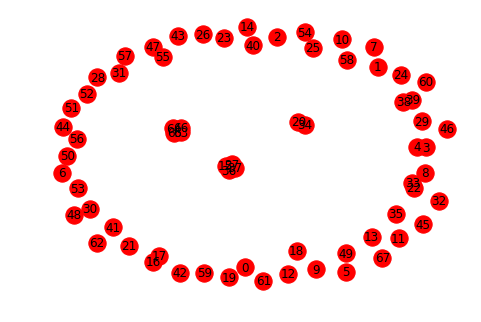

In [199]:
#creating graphs
#https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_adjacency.html

G=nx.from_pandas_adjacency(adj_matrix_0_018)
#print(nx.info(G))

#G = nx.from_numpy_matrix(adj_matrix_0_018.values, parallel_edges=True, 
#                         create_using=nx.MultiDiGraph())
#nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_size=50, node_color="red")
#nx.draw_networkx_edges(G, pos=nx.spring_layout(G), width=40, edge_color="black")

nx.draw(G, with_labels=True)
plt.show()

In [200]:
adj_matrix_0_036 = adj_matrix_0_036.applymap(lambda x: 1 if x <= 0.036 else 0)

In [201]:
adj_matrix_0_036

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


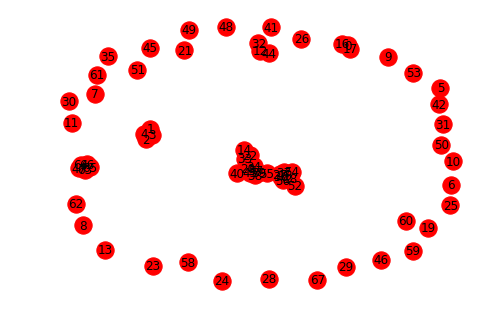

In [202]:
G=nx.from_pandas_adjacency(adj_matrix_0_036)
nx.draw(G, with_labels=True)
plt.show()

In [203]:
adj_matrix_0_055 = adj_matrix_0_055.applymap(lambda x: 1 if x <= 0.055 else 0)

In [204]:
adj_matrix_0_055

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


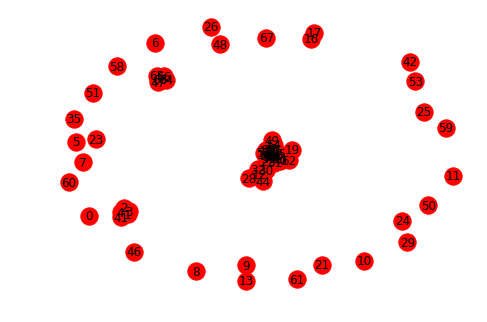

In [205]:
G=nx.from_pandas_adjacency(adj_matrix_0_055)
nx.draw(G, with_labels=True)
plt.show()

In [206]:
adj_matrix_0_01 = adj_matrix_0_01.applymap(lambda x: 1 if x <= 0.01 else 0)

In [207]:
adj_matrix_0_01

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


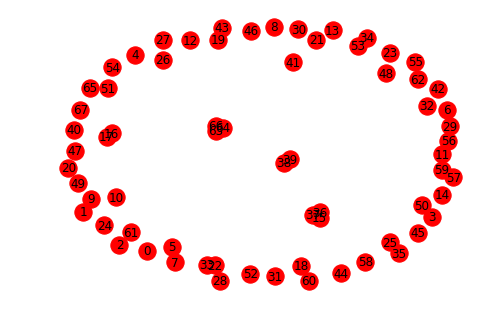

In [208]:
G=nx.from_pandas_adjacency(adj_matrix_0_01)
nx.draw(G, with_labels=True)
plt.show()

In [209]:
adj_matrix_2_0 = adj_matrix_2_0.applymap(lambda x: 1 if x <= 2.0 else 0)

In [210]:
adj_matrix_2_0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


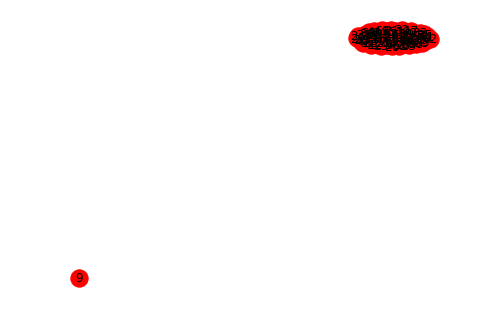

In [211]:
G=nx.from_pandas_adjacency(adj_matrix_2_0)
nx.draw(G, with_labels=True)
plt.show()